# Explore here

### Paso 1: Carga del conjunto de datos

In [41]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


En este caso solo nos interesan las columnas Latitude, Longitude y MedInc

In [42]:
total_data = total_data[["Latitude","Longitude","MedInc"]]
total_data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


Dividir en Train y Test

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test= train_test_split(total_data, test_size=0.2, random_state=42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


### Paso 2: Construye un K-Means

Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means

In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset

In [45]:
clusters = model.predict(X_train)
X_train['cluster'] = clusters

X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


 Grafícala en un diagrama de puntos y describe lo que ves.

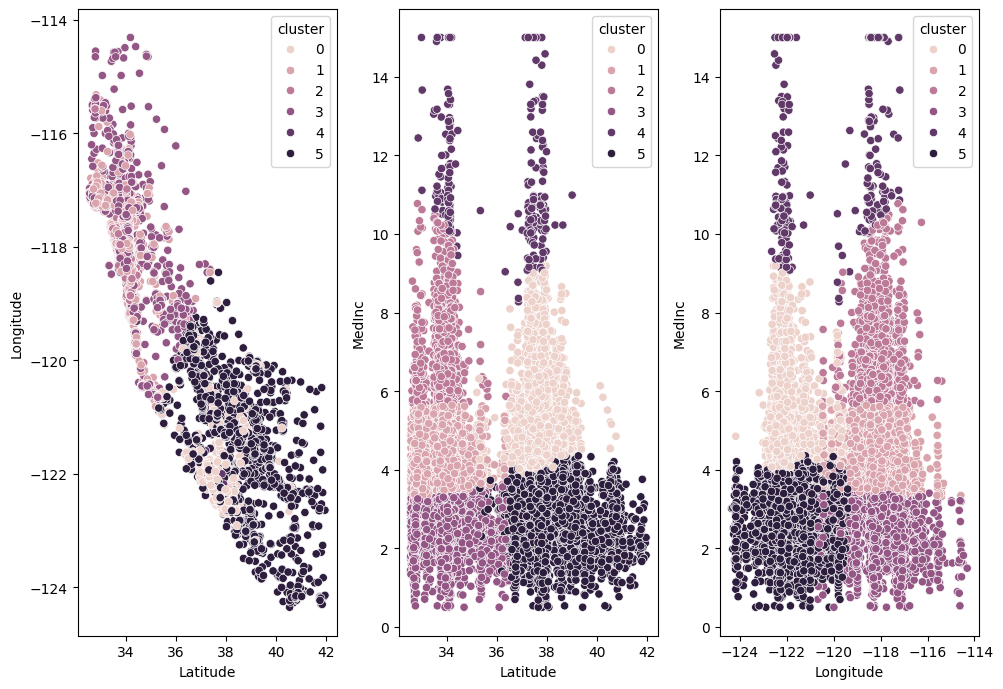

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 7))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
plt.tight_layout()

plt.show()

### Paso 3: Predice con el conjunto de test

In [47]:
p_clusters = model.predict(X_test)
X_test['cluster'] = p_clusters

X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


Grafica de ambos clusters

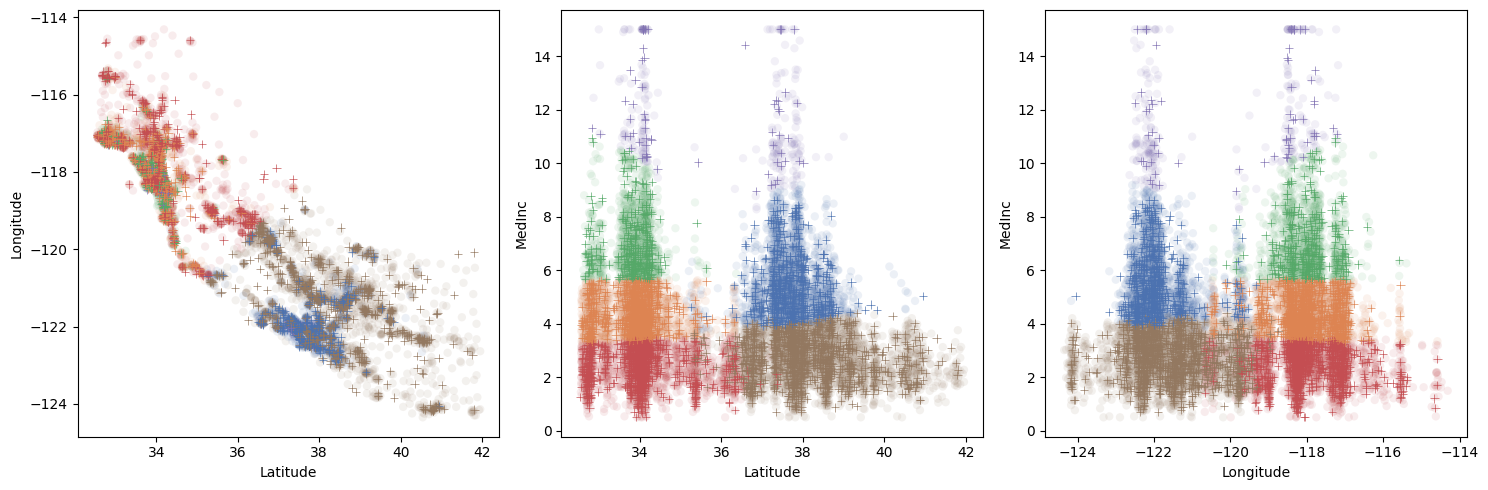

In [48]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

### Paso 4: Entrena un modelo de clasificación supervisada

In [52]:
from xgboost import XGBClassifier

xbmodel = XGBClassifier(random_state = 42)
xbmodel.fit(X_train, clusters)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
from sklearn.metrics import accuracy_score

y_pred = xbmodel.predict(X_test)

accuracy_score(p_clusters, y_pred)

1.0

### Paso 5: Guarda los modelos

In [54]:
from pickle import dump

dump(model, open("/workspace/house-grouping-k-mean-ul/models/KMeans_clusters-6_default_42.sav", "wb"))
dump(xbmodel, open("/workspace/house-grouping-k-mean-ul/models/XGBClassifier_default_42.sav", "wb"))